In [133]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

In [87]:
data1 = pd.read_csv("music_genre.csv")
data2 = pd.read_csv("SpotifyFeatures.csv")

In [88]:
np.unique(data2['genre'].tolist())

array(['A Capella', 'Alternative', 'Anime', 'Blues', "Children's Music",
       'Children’s Music', 'Classical', 'Comedy', 'Country', 'Dance',
       'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera',
       'Pop', 'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul',
       'Soundtrack', 'World'], dtype='<U16')

In [89]:
delete_gen = ['A Capella', 'Alternative', 'Anime', 'Blues', "Children's Music",
       'Children’s Music', 'Classical', 'Comedy', 'Country', 'Dance',
       'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera',
     'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul',
       'Soundtrack', 'World']

In [90]:
data2 = data2.set_index('genre')
for i in delete_gen:
    data2 = data2.drop(i, axis=0)
data2 = data2.reset_index(level=0)
# data = data.drop_duplicates(subset=['artist_name', "track_name"], keep=False)
# data = data.drop(columns = ['music_genre', 'artist_name', 'track_name', 'instance_id'], axis = 1)

In [91]:
data1 = data1.drop(columns = ['instance_id', 'obtained_date'], axis = 1).rename(columns = {'music_genre': 'genre'})
data2 = data2.drop(columns = ['track_id', 'time_signature'], axis = 1)

In [92]:
data = data1.append(data2)

In [93]:
data['genre'] = data['genre'].replace('Rap', 'Hip-Hop')

In [94]:
data = data.drop_duplicates(subset=['artist_name', "track_name"], keep=False)

In [95]:
data.groupby('genre').size()

genre
Alternative    3702
Anime          4952
Blues          4642
Classical      4935
Country        4413
Electronic     4756
Hip-Hop        4611
Jazz           4646
Pop            5851
Rock           3084
dtype: int64

In [96]:
data[data.duplicated()] #missing values

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,genre


In [97]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,45592.000000,45592.000000,45592.000000,4.559200e+04,45592.000000,45592.000000,45592.000000,45592.000000,45592.000000,45592.000000
mean,43.715038,0.324545,0.550580,2.240244e+05,0.591673,0.191213,0.191872,-9.282124,0.084033,0.454237
std,16.321760,0.348910,0.176603,1.270879e+05,0.271008,0.332506,0.161098,6.370689,0.091306,0.249627
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,33.000000,0.022400,0.436000,1.775228e+05,0.410000,0.000000,0.096300,-11.162000,0.035700,0.251000
50%,43.000000,0.163000,0.563000,2.192400e+05,0.637000,0.000216,0.125000,-7.317500,0.047000,0.445000
75%,55.000000,0.608000,0.677000,2.680582e+05,0.816000,0.204000,0.238000,-5.124000,0.083800,0.648000
max,100.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


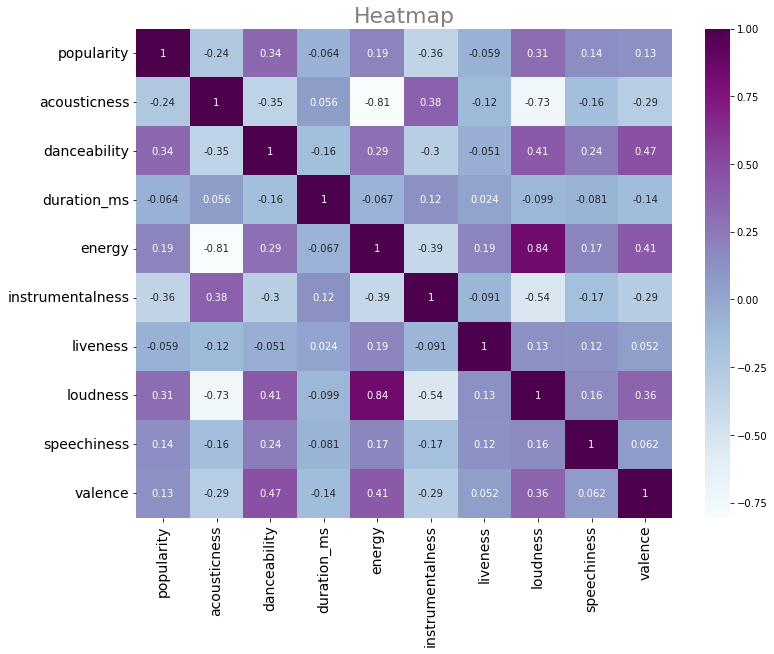

In [98]:
# Heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(data.drop(['genre','artist_name','track_name','key'], axis=1).corr(), annot=True, cmap='BuPu')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Heatmap', fontsize=22, color='grey')
plt.show()

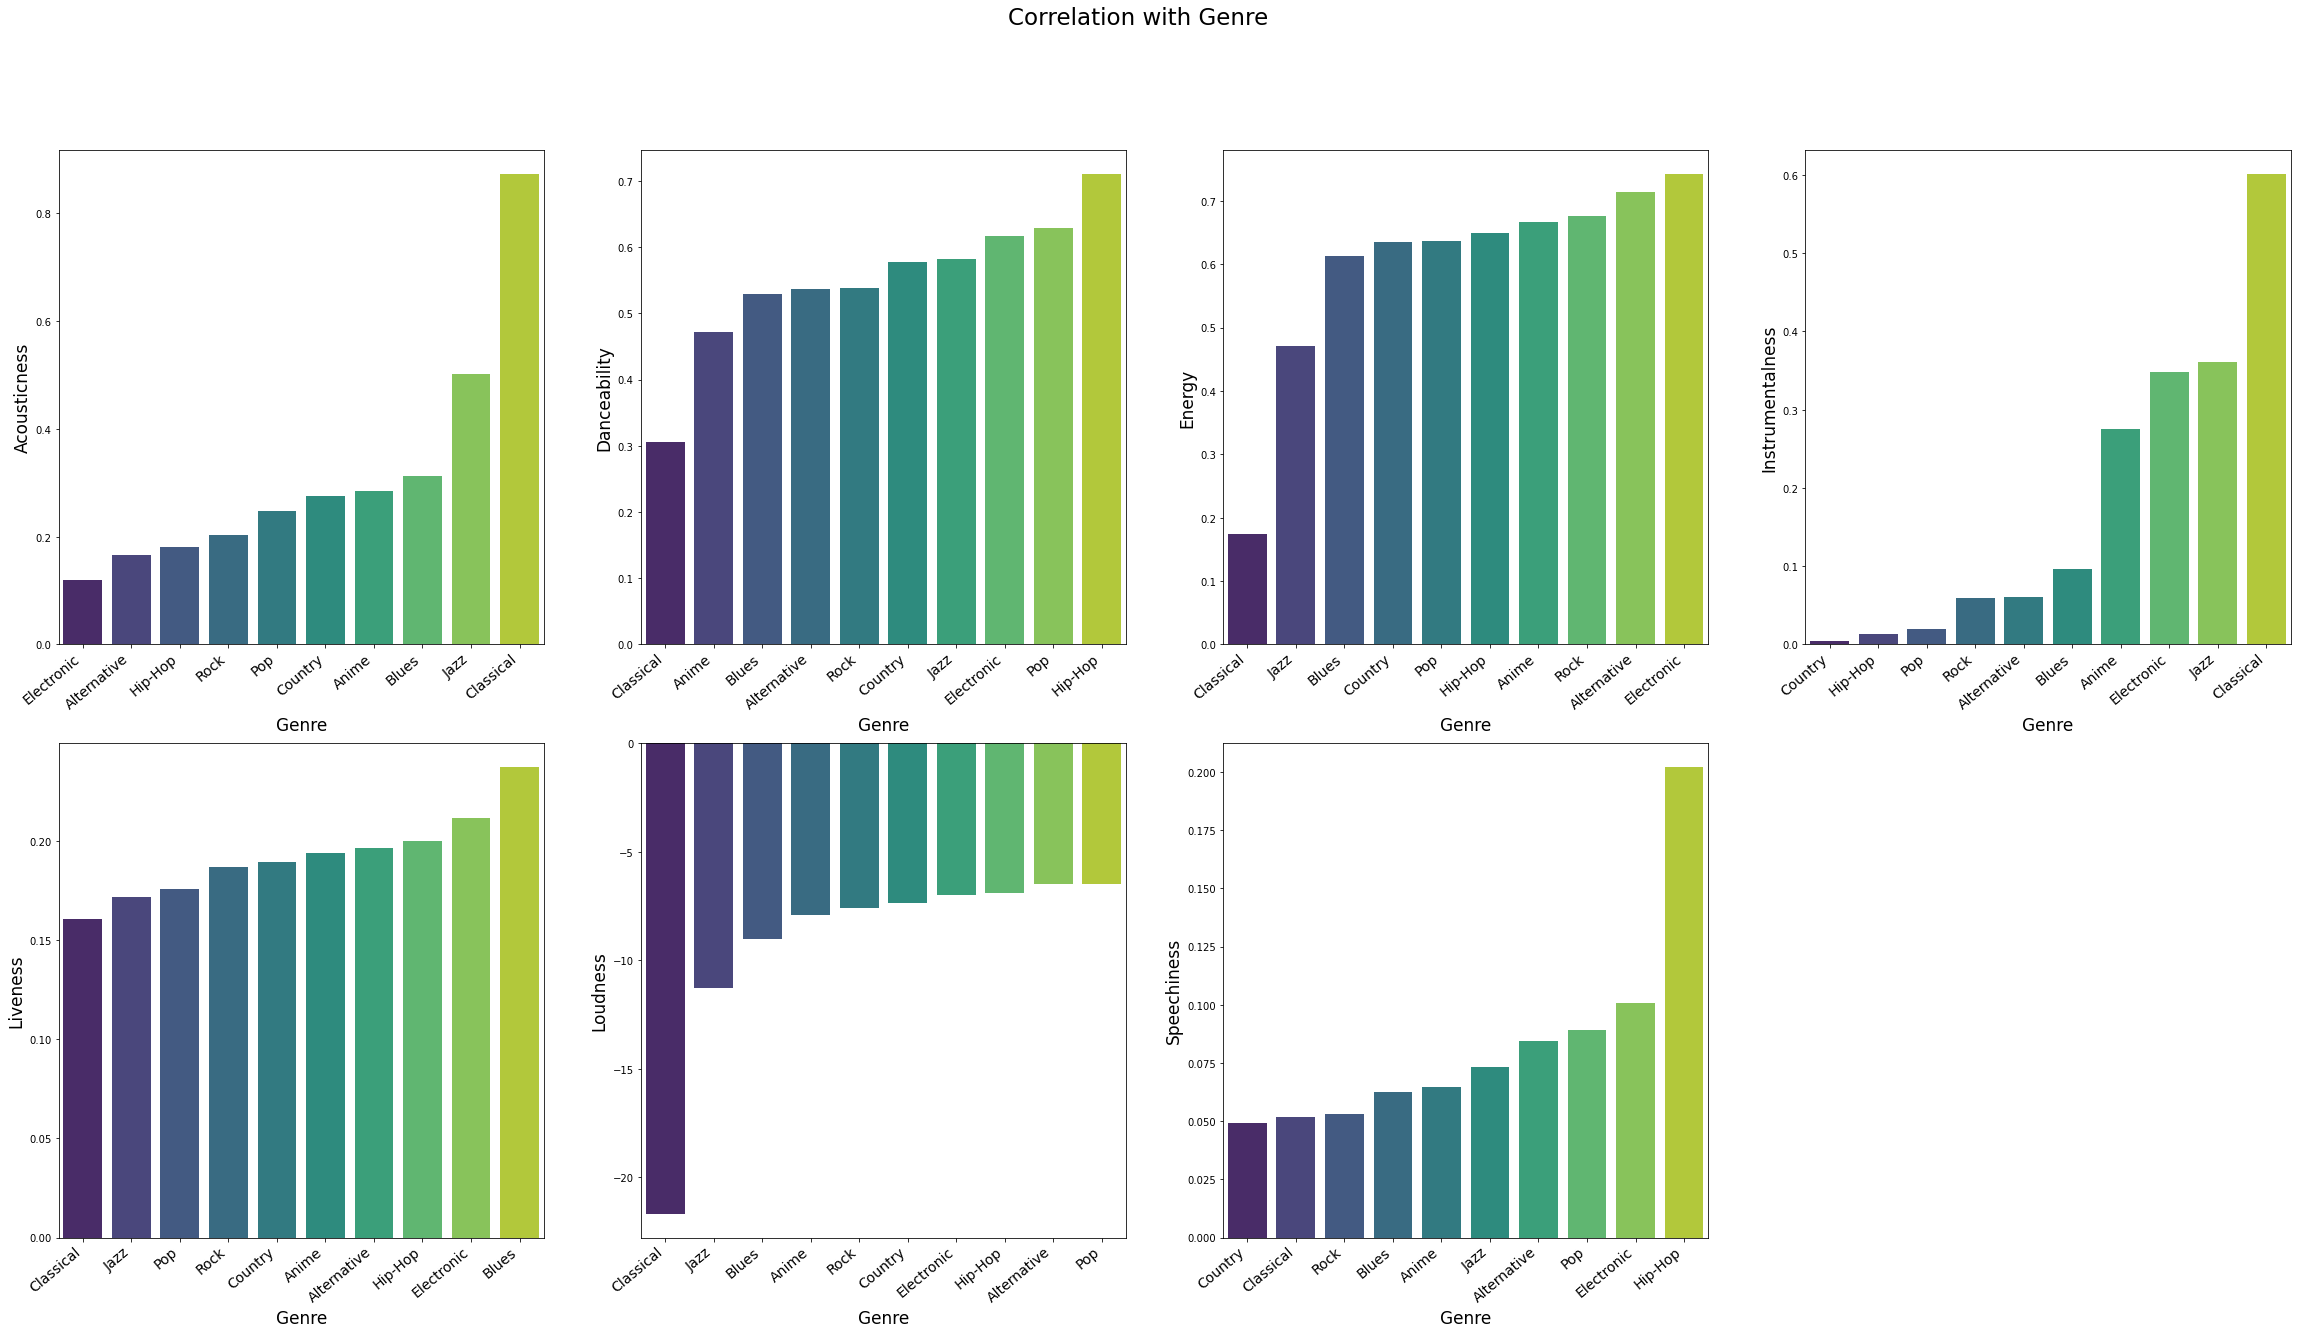

In [99]:
# sum up popularity by genre and divide them by the number of songs in each genre
genre_popularity = data[['genre','popularity']]
genre_rank =  data.groupby('genre')[['popularity']].mean().sort_values(by='popularity', ascending=True).reset_index()

# for col in ["acousticness","danceability","energy","instrumentalness","liveness","loudness", "speechiness", "popularity"]:
#     genre_popularity = data[['genre',col]]
#     genre_rank =  data.groupby('genre')[[col]].mean().sort_values(by=col, ascending=True).reset_index()

#     plt.figure(figsize = (12, 6))
#     sns.barplot(x='genre', y=col, data=genre_rank, palette = "viridis")

#     plt.xticks(fontsize=14, rotation=40,ha="right")
#     plt.yticks(fontsize=14)
#     plt.xlabel('Genre', fontsize=18)
#     plt.ylabel( col.capitalize(), fontsize=18)
#     plt.title('Average of ' + col +' by genres', fontweight='bold', fontsize=22, color='grey')
#     plt.show()
    
plt.figure(figsize=(40,20))
num1 = 1

for col in ["acousticness","danceability","energy","instrumentalness","liveness","loudness", "speechiness", "popularity"]:
    if num1<=7:
        ax = plt.subplot(2,4, num1)
        #genre_popularity = data[['genre',col]]
        genre_rank =  data.groupby('genre')[[col]].mean().sort_values(by=col, ascending=True).reset_index()
        sns.barplot(x='genre', y=col, data=genre_rank, palette = "viridis")
        plt.xlabel('Genre', fontsize= 17)
        plt.xticks(fontsize=14, rotation=40,ha="right")
        plt.ylabel(col.capitalize(),fontsize = 17)
    num1 +=1
plt.suptitle("Correlation with Genre",fontsize = 23)
plt.show()

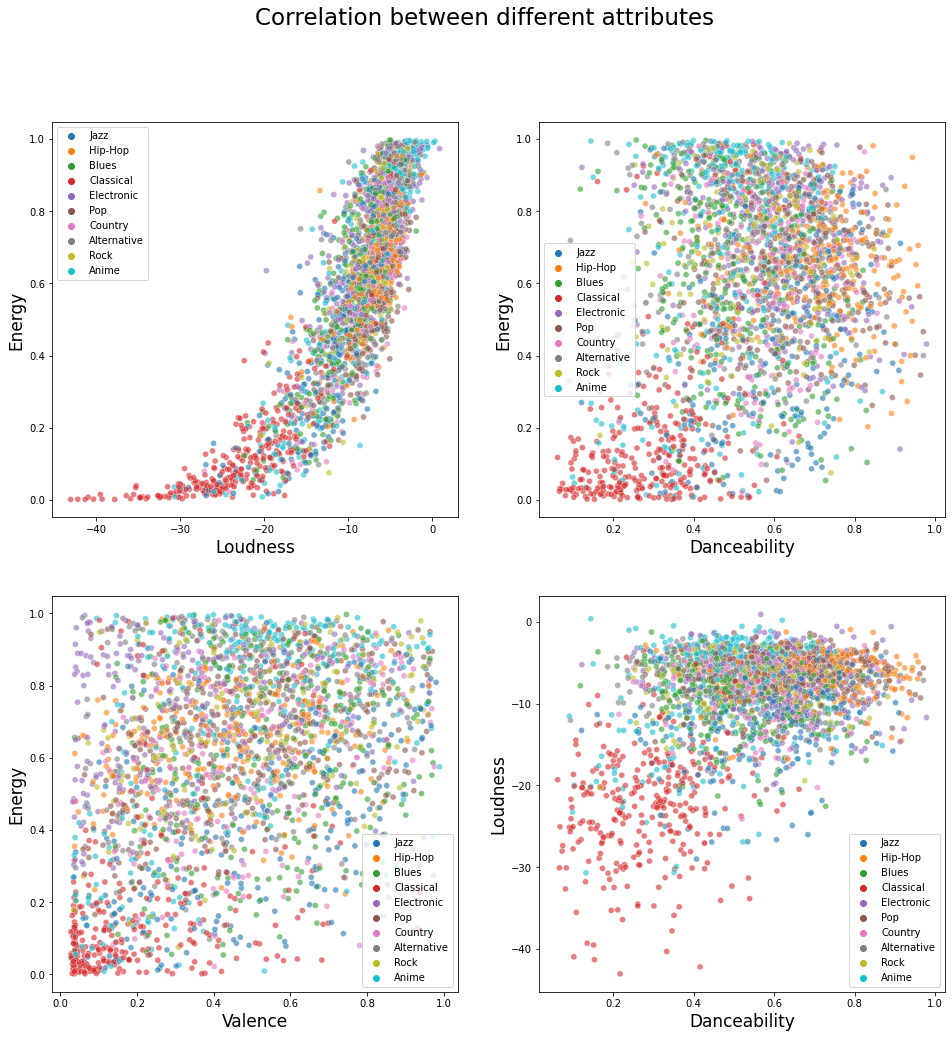

In [100]:
df_sub2 = data.sample(int(0.06*len(data)))

plt.figure(figsize=(16,16))
num1 = 1


ax = plt.subplot(2,2, 1)
sns.scatterplot(x ="loudness", y="energy", data=df_sub2, hue='genre', legend = "auto", alpha=0.6)
plt.xlabel("Loudness",fontsize = 17)
plt.ylabel("Energy",fontsize = 17)
plt.legend()

ax = plt.subplot(2,2, 2)
sns.scatterplot(x ="danceability", y="energy", data=df_sub2, hue='genre', legend = "auto", alpha=0.6)
plt.xlabel("Danceability",fontsize = 17)
plt.ylabel("Energy",fontsize = 17)
plt.legend()

ax = plt.subplot(2,2,3)
sns.scatterplot(x ="valence", y="energy", data=df_sub2, hue='genre', legend = "auto", alpha=0.6)
plt.xlabel("Valence",fontsize = 17)
plt.ylabel("Energy",fontsize = 17)
plt.legend()

ax = plt.subplot(2,2,4)
sns.scatterplot(x ="danceability", y="loudness", data=df_sub2, hue='genre', legend = "auto", alpha=0.6)
plt.xlabel("Danceability",fontsize = 17)
plt.ylabel("Loudness",fontsize = 17)
plt.legend()

plt.suptitle("Correlation between different attributes",fontsize = 23)
plt.show()

In [101]:
unused_col = ['artist_name', 'track_name', 'tempo', 'duration_ms']
data = data.drop(columns=unused_col).reset_index(drop=True)

In [102]:
data.select_dtypes(exclude='number').head()

,key,mode,genre
0,A#,Minor,Electronic
1,D,Minor,Electronic
2,G#,Major,Electronic
3,C#,Major,Electronic
4,F#,Major,Electronic


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45592 entries, 0 to 45591
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45592 non-null  float64
 1   acousticness      45592 non-null  float64
 2   danceability      45592 non-null  float64
 3   energy            45592 non-null  float64
 4   instrumentalness  45592 non-null  float64
 5   key               45592 non-null  object 
 6   liveness          45592 non-null  float64
 7   loudness          45592 non-null  float64
 8   mode              45592 non-null  object 
 9   speechiness       45592 non-null  float64
 10  valence           45592 non-null  float64
 11  genre             45592 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.2+ MB


In [104]:
data['mode'].unique().tolist()

['Minor', 'Major']

In [105]:
data['key'].unique().tolist()

['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#']

In [106]:
mode_dict = {'Major' : 1, 'Minor' : 0}
key_dict = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 
        'F#' : 7, 'G' : 9, 'G#' : 10, 'A' : 11, 'A#' : 12, 'B' : 12}
data['mode'].replace(mode_dict, inplace=True)
data['key'] = data['key'].replace(key_dict).astype(int)

In [107]:
data.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,genre
0,27.0,0.00468,0.652,0.941,0.79200,12,0.115,-5.201,0,0.0748,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,3,0.124,-7.043,0,0.0300,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,10,0.534,-4.617,1,0.0345,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,2,0.157,-4.498,1,0.2390,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,7,0.157,-6.266,1,0.0413,0.323,Electronic


In [108]:
data.isna().sum().sum() #missing values

0

<AxesSubplot:xlabel='count', ylabel='genre'>

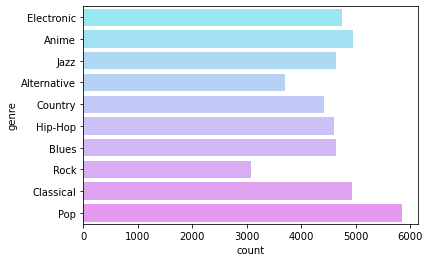

In [132]:
data['genre'].value_counts()/len(data)
sns.countplot(y="genre", data=data, palette='cool', alpha=0.5)